In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import io

In [2]:
data_frame = pd.read_csv("AllDrugs_States.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [3]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [4]:
data_frame[(data_frame["State"] == "Alabama")]

,Notes,State,State Code,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,2013.0,2013.0,137,4833722.0,2.8
1,NaN,Alabama,1.0,2014.0,2014.0,239,4849377.0,4.9
2,NaN,Alabama,1.0,2015.0,2015.0,268,4858979.0,5.5
3,NaN,Alabama,1.0,2016.0,2016.0,345,4863300.0,7.1
4,NaN,Alabama,1.0,2017.0,2017.0,444,4874747.0,9.1
5,NaN,Alabama,1.0,2018.0,2018.0,435,4887871.0,8.9
6,NaN,Alabama,1.0,2019.0,2019.0,525,4903185.0,10.7
7,NaN,Alabama,1.0,2020.0,2020.0,714,4921532.0,14.5


In [5]:
C_All0 = data_frame[(data_frame["State"] == "Alabama") & 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
C_All1 = data_frame[(data_frame["State"] == "Alabama") & (data_frame["Year"] != 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
C20_All1 = data_frame[(data_frame["State"] == "Alabama") & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 

In [6]:
x_all0 = C_All0["Year"]
x_all1 = C_All1["Year"]
y_all1 = C_All1["Crude Rate"]

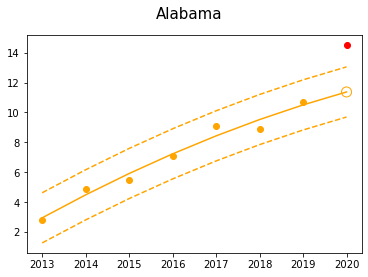

In [7]:
coeff1 = np.polyfit(x_all1, y_all1, 2)
yfit1 = np.polyval(coeff1,x_all1)
res1 = np.sum((y_all1  - yfit1)**2)

std1 = np.sqrt(res1/(len(y_all1)-3))
#std1 = np.sqrt(res1/5)
#residiuals divied by n-p-1, where (p+1) = 3 for a quadratic

plt.suptitle('Alabama', fontsize=15)
plt.plot(x_all0, np.polyval(coeff1,x_all0), color='orange')
plt.scatter(x_all1, y_all1, color='orange')
plt.scatter(2020.0, C20_All1["Crude Rate"], color='red')
plt.scatter(2020.0, np.polyval(coeff1, 2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x_all0, np.polyval(coeff1,x_all0)+3*std1, color='orange', linestyle='dashed')
plt.plot(x_all0, np.polyval(coeff1,x_all0)-3*std1, color='orange', linestyle='dashed')


In [8]:
states = data_frame["State"]

statelist = []
for y in states:
    [statelist.append(y) for y in states if y not in statelist]

length = len(statelist)

middle_index = length // 3

first_half = statelist[:middle_index]
second_half = statelist[middle_index: 2*middle_index]
third_half = statelist[2*middle_index +1 : length-1]

#print(first_half)
#print(second_half)
#print(third_half)

Ohio  44.249201
Oklahoma  28.486293
Oregon  26.829268
Pennsylvania  13.995838
Rhode Island  52.084857
South Carolina  51.124438
South Dakota -6.666667
Tennessee  39.488785
Texas  33.843212
Utah  16.666667
Vermont  20.957668
Virginia  45.22293
Washington  33.400201
West Virginia  61.27451
Wisconsin  29.25801
Wyoming  21.0199


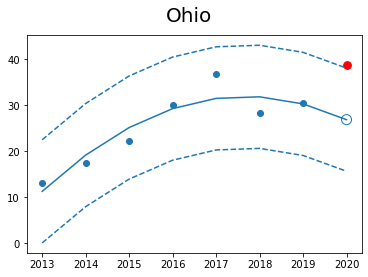

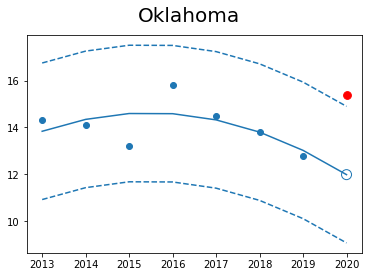

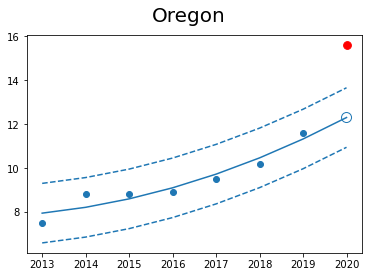

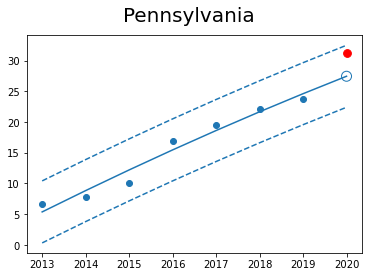

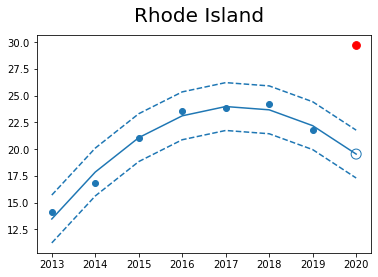

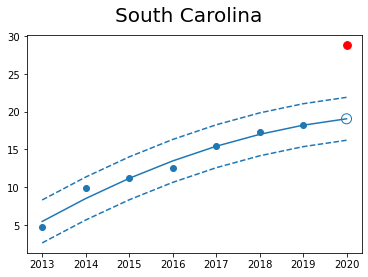

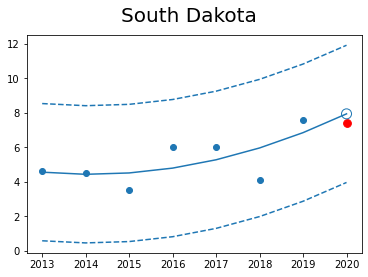

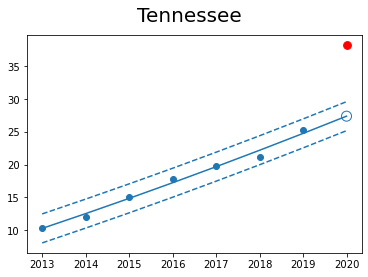

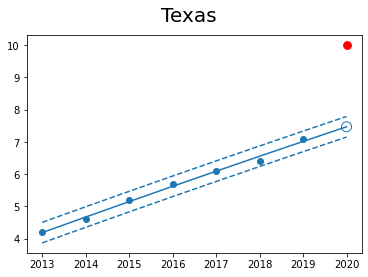

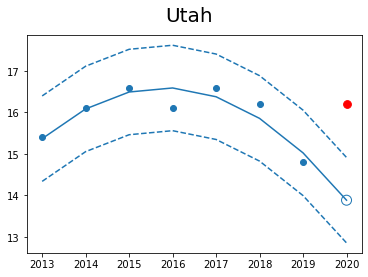

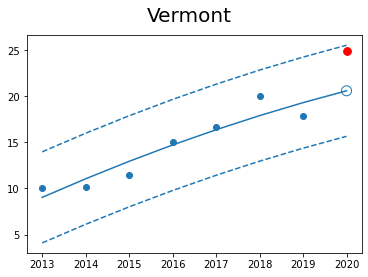

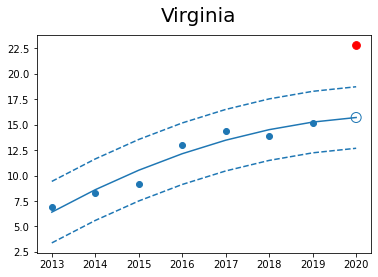

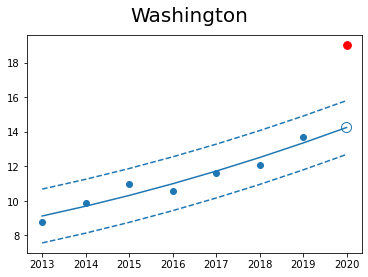

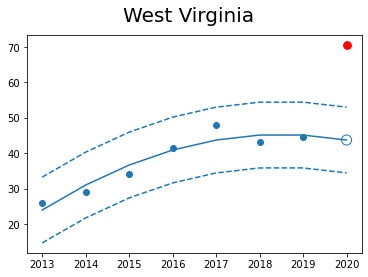

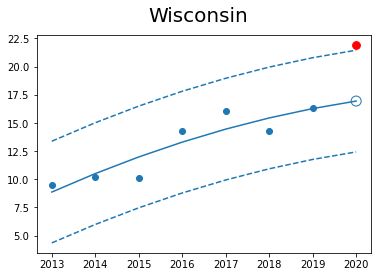

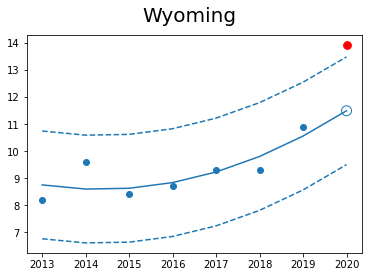

<Figure size 432x288 with 0 Axes>

In [9]:
for x in third_half:
    C_All0 = data_frame[(data_frame["State"] == x) & 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
    C_All1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] != 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    C20_All1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 

    x_all0 = C_All0["Year"]
    x_all1 = C_All1["Year"]
    y_all1 = C_All1["Crude Rate"]

    coeff1 = np.polyfit(x_all1, y_all1, 2)
    yfit1 = np.polyval(coeff1,x_all1)
    res1 = np.sum((y_all1  - yfit1)**2)

    std1 = np.sqrt(res1/(len(y_all1)-3))
    #std1 = np.sqrt(res1/5)

    plt.suptitle(x, fontsize=20)
    plt.plot(x_all0, np.polyval(coeff1,x_all0), color='tab:blue')
    plt.scatter(x_all1, y_all1, color='tab:blue')
    plt.scatter(2020.0, C20_All1["Crude Rate"], s=60, color='red')
    plt.scatter(2020.0, np.polyval(coeff1, 2020), s=100, edgecolors='tab:blue', facecolors='none')
    plt.plot(x_all0, np.polyval(coeff1,x_all0)+3*std1, color='tab:blue', linestyle='dashed')
    plt.plot(x_all0, np.polyval(coeff1,x_all0)-3*std1, color='tab:blue', linestyle='dashed')  
    str1 = x
    str2 ='_AD'
    str3 = '.pdf'
    strtot = str1 + str2 + str3
    plt.savefig(str(strtot)) 
    plt.figure()
    diff = (C20_All1["Crude Rate"] - np.polyval(coeff1, 2020)) / np.polyval(coeff1, 2020)*100
    print(x, diff.to_string(index=False))
    print(x, diff.to_string(index=False), file=open('output_All.txt', 'a'))

    
    

In [10]:
from matplotlib import rcParams

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'DejaVu Sans',
    'font.size': 6,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 700 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * ratio  # height in inches
fig_size = [fig_width, fig_height]
rcParams.update({'figure.figsize': fig_size})

0 0 Alabama
0 1 Alaska
0 2 Arizona
0 3 Arkansas
0 4 California
0 5 Colorado
0 6 Connecticut
1 0 Delaware
1 1 District of Columbia
1 2 Florida
1 3 Georgia
1 4 Hawaii
1 5 Idaho
1 6 Illinois
2 0 Indiana
2 1 Iowa
2 2 Kansas
2 3 Kentucky
2 4 Louisiana
2 5 Maine
2 6 Maryland
3 0 Massachusetts
3 1 Michigan
3 2 Minnesota
3 3 Mississippi
3 4 Missouri
3 5 Montana
3 6 Nebraska
4 0 Nevada
4 1 New Hampshire
4 2 New Jersey
4 3 New Mexico
4 4 New York
4 5 North Carolina
4 6 North Dakota
5 0 Ohio
5 1 Oklahoma
5 2 Oregon
5 3 Pennsylvania
5 4 Rhode Island
5 5 South Carolina
5 6 South Dakota
6 0 Tennessee
6 1 Texas
6 2 Utah
6 3 Vermont
6 4 Virginia
6 5 Washington
6 6 West Virginia
7 0 Wisconsin
7 1 Wyoming


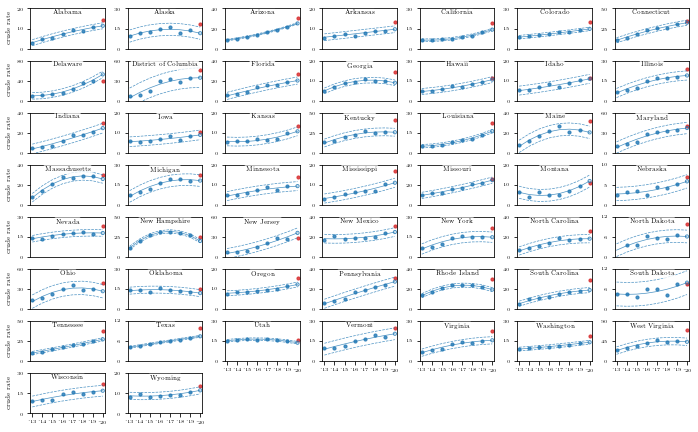

In [11]:
ncols=7
nrows=8

fig, ax = plt.subplots(ncols=ncols,nrows=nrows)
fig.patch.set_facecolor('white')

for i in range(len(statelist[:-1])):
    x = statelist[i]
    C_All0 = data_frame[(data_frame["State"] == x) & 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 
    C_All1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] != 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
    C20_All1 = data_frame[(data_frame["State"] == x) & (data_frame["Year"] == 2020) &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float) 

    y_all1 = C_All1["Crude Rate"]
    x_all0 = C_All0["Year"]
    x_all1 = C_All1["Year"][y_all1.notna()]
    y_all1 = y_all1.dropna()

    coeff1 = np.polyfit(x_all1, y_all1, 2)
    yfit1 = np.polyval(coeff1,x_all1)
    res1 = np.sum((y_all1  - yfit1)**2)

    #std1 = np.sqrt(res1/(len(y_all1)-3))
    std1 = np.sqrt(res1/5)

    ii = i//ncols
    jj = i%ncols
    print(ii,jj,x)
    
    ymin = np.floor(0.8*min(np.polyval(coeff1,x_all0)-3*std1))
    ymax = np.ceil(1.2*max(np.append(np.polyval(coeff1,x_all0)+3*std1,float(C20_All1["Crude Rate"]))))
    #ax[ii,jj].suptitle(x, fontsize=20)
    text = ax[ii,jj].text(0.5, 0.88, x, horizontalalignment='center', verticalalignment='center', transform = ax[ii,jj].transAxes,\
                         bbox=dict(facecolor='white', edgecolor='white',alpha=0.8, boxstyle='round,pad=0.2'))
    
    ax[ii,jj].plot(x_all0, np.polyval(coeff1,x_all0), color='tab:blue',lw=0.7,alpha=0.8)
    ax[ii,jj].scatter(x_all1, y_all1, s=10, color='tab:blue',alpha=0.8)
    ax[ii,jj].scatter(2020.0, C20_All1["Crude Rate"], s=10, color='tab:red',alpha=0.8)
    ax[ii,jj].scatter(2020.0, np.polyval(coeff1, 2020), s=10, edgecolors='tab:blue', facecolors='none',alpha=0.8)
    ax[ii,jj].plot(x_all0, np.polyval(coeff1,x_all0)+3*std1, color='tab:blue', linestyle='dashed',lw=0.7,alpha=0.8)
    ax[ii,jj].plot(x_all0, np.polyval(coeff1,x_all0)-3*std1, color='tab:blue', linestyle='dashed',lw=0.7,alpha=0.8)  
    ax[ii,jj].set_xlim(2012.8,2020.2)
    ax[ii,jj].set_xticks([])
    ax[ii,jj].set_ylim(0,np.ceil(ymax/10)*10)
    ax[ii,jj].set_yticks(np.arange(0,np.ceil(ymax/10)*10+1,np.ceil(ymax/10)*10/2))

ax[3,3].set_ylim(0,20)
ax[3,3].set_yticks([0,10,20])
ax[4,6].set_ylim(0,12)
ax[4,6].set_yticks([0,6,12])
ax[5,6].set_ylim(0,12)
ax[5,6].set_yticks([0,6,12])
ax[6,1].set_ylim(0,12)
ax[6,1].set_yticks([0,6,12])

ax[0,0].set_ylabel(r"crude rate")
ax[1,0].set_ylabel(r"crude rate")
ax[2,0].set_ylabel(r"crude rate")
ax[3,0].set_ylabel(r"crude rate")
ax[4,0].set_ylabel(r"crude rate")
ax[5,0].set_ylabel(r"crude rate")
ax[6,0].set_ylabel(r"crude rate")
ax[7,0].set_ylabel(r"crude rate")
    
ax[6,2].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,2].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[6,3].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,3].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[6,4].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,4].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[6,5].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,5].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[6,6].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[6,6].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)

ax[7,0].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[7,0].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)
ax[7,1].set_xticks([2013,2014,2015,2016,2017,2018,2019,2020])
ax[7,1].set_xticklabels(["'13","'14","'15","'16","'17","'18","'19","'20"],rotation=0)

fig.delaxes(ax[7][2])
fig.delaxes(ax[7][3])
fig.delaxes(ax[7][4])
fig.delaxes(ax[7][5])
fig.delaxes(ax[7][6])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig(r"alldrugs_states.png",dpi=480)
plt.show()